<a href="https://colab.research.google.com/github/Harshininew/first/blob/main/Traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Needed Installs and Libraries




In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet


##File Uploads & Data Prep


In [ ]:
from google.colab import files
upload = files.upload()

for fn in upload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(upload[fn])))
traffic = pd.read_csv(fn)
traffic.head()

Saving credzu - Clicks.csv to credzu - Clicks.csv
User uploaded file "credzu - Clicks.csv" with length 7244 bytes


,Date,Clicks
0,2022-04-10,10
1,2022-04-11,7
2,2022-04-12,10
3,2022-04-13,8
4,2022-04-14,8


###Re-making the traffic chart


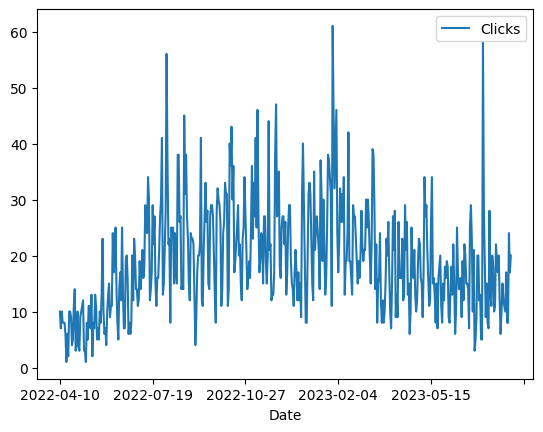

In [ ]:
traffic.set_index('Date').plot();

###Converting columns into FB prophet names

In [ ]:
traffic.columns = ["ds", "y"]
traffic.head()

,ds,y
0,2022-04-10,10
1,2022-04-11,7
2,2022-04-12,10
3,2022-04-13,8
4,2022-04-14,8


###Holidays (one time events) using Google Core updates

Updates until May 4th, 2020 are added. You can add a date to the array if needed in the format YYYY-MM-DD. Assumes a 14 day window after the update to give time for changes to reflect. You can adjust this with upper_window if needed.

In [ ]:
updates = pd.DataFrame({
  'holiday': 'Core Update',
  'ds': pd.to_datetime(['2015-07-17', '2016-01-08',
                        '2016-09-27', '2017-03-08', '2017-07-09', '2018-03-08', '2018-04-17',
                        '2018-08-01', '2019-03-12', '2019-06-03', '2019-09-24', '2019-10-25',
                        '2019-12-09', '2020-01-13', '2020-05-04', '2020-12-3', '2021-6-3', '2021-7-12', '2021-11-18','2022-05-26','2022-06-1', '2022-09-13','2023-05-15']),
  'lower_window': 0,
  'upper_window': 14,
})
updates.head()

,holiday,ds,lower_window,upper_window
0,Core Update,2015-07-17,0,14
1,Core Update,2016-01-08,0,14
2,Core Update,2016-09-27,0,14
3,Core Update,2017-03-08,0,14
4,Core Update,2017-07-09,0,14


##Creating Forecast

Forecasting by default has periods = 365, which makes a forecast of one year. You can adjust this to forecast shorter or longer periods.

In [ ]:
# Python
m = Prophet()
m.fit(traffic)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpap5w6xxw/2su4u2d5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpap5w6xxw/vvuvjg0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80353', 'data', 'file=/tmp/tmpap5w6xxw/2su4u2d5.json', 'init=/tmp/tmpap5w6xxw/vvuvjg0o.json', 'output', 'file=/tmp/tmpap5w6xxw/prophet_model43p0yfhd/prophet_model-20230810191442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:14:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
847,2024-08-04
848,2024-08-05
849,2024-08-06
850,2024-08-07
851,2024-08-08


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
847,2024-08-04,-9.402781,-24.091185,5.078226
848,2024-08-05,0.369280,-13.860350,14.057058
849,2024-08-06,0.108250,-14.859601,14.185184
850,2024-08-07,0.860803,-12.914072,14.444340
851,2024-08-08,-1.443310,-15.566990,12.197654


In [ ]:
# Exporting The Forecast

from google.colab import files

# We set the variable forthe name of the CSV where we will store the new MDs
forecastcsv = 'forecast.csv'
print("output csv name: ", forecastcsv)

forecast.to_csv(forecastcsv, encoding='utf-8', index=False)
print("Saving results on:", forecastcsv)
files.download(forecastcsv)

output csv name:  forecast.csv
Saving results on: forecast.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Forecast Graph

You may need to adjust the ylabel to indicate the scale such as thousands, millions, etc. Press the play button to re-run this cell and see the updates.

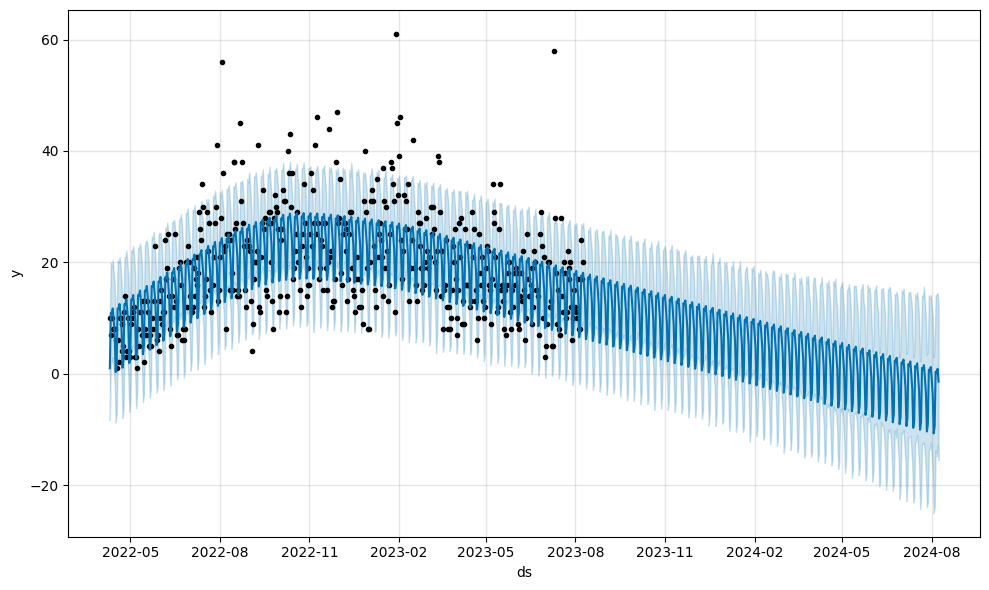

In [ ]:
# Python
fig1 = m.plot(forecast)

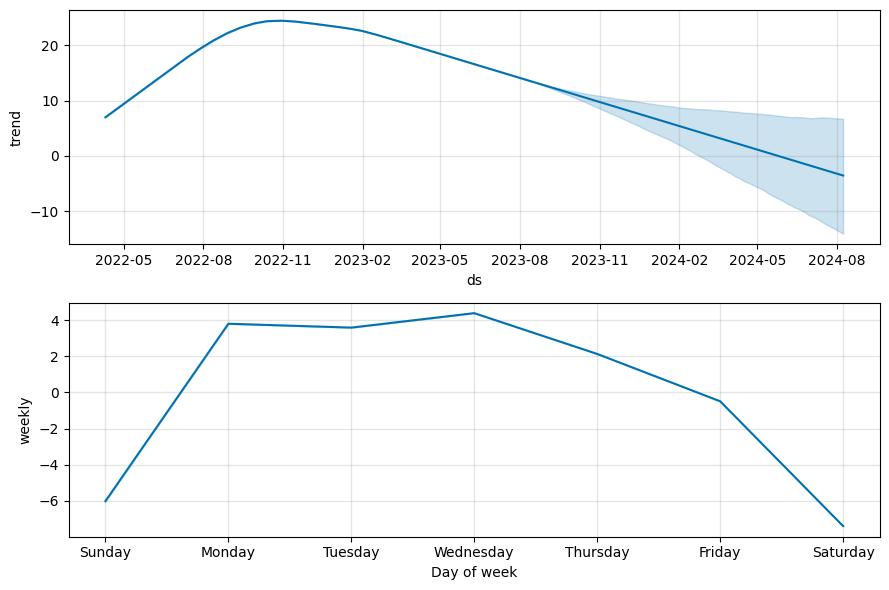

In [ ]:
# Python
fig2 = m.plot_components(forecast)


# Interactive Section

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)
